In [11]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn import datasets

In [12]:
datos = datasets.load_breast_cancer()
print(datos)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [13]:
print('Informacón en el dataset')
print(datos.keys())


Informacón en el dataset
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [14]:
print('caracteristicas del dataset:')
print(datos.DESCR)

caracteristicas del dataset:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For i

In [15]:
X = datos.data
y = datos.target
#Separamos los datos de train en entrenamiento y prueba para probar los algoridmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Se escalan todo los datos
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)
algoritmo = LogisticRegression()
#Entrenando modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [16]:
#Realizando una predicción
y_pred = algoritmo.predict(X_test)

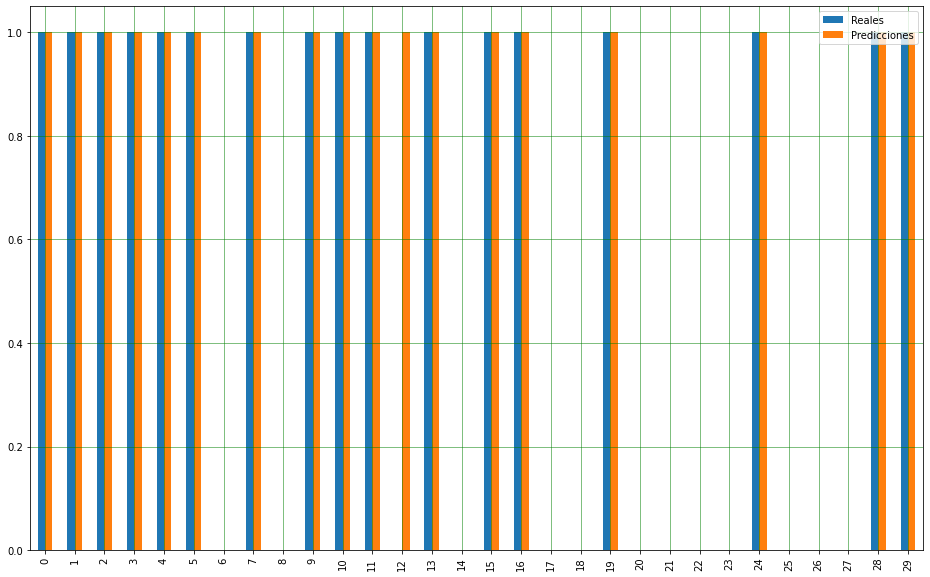

In [17]:
datos_comp = pd.DataFrame({'Reales': y_test.flatten(), 'Predicciones': y_pred.flatten()})
datos_comp2 = datos_comp.head(30)
datos_comp2.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [18]:
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de confusión')
print(matriz)

Matriz de confusión
[[44  1]
 [ 1 68]]


In [19]:
#Calculando la precision del modelo
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9855072463768116


In [20]:
#Calculando el puntaje F1
puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del moelo:')
print(puntajef1)

Puntaje F1 del moelo:
0.9855072463768116


In [21]:
#Clalculando la curva de roc-auac del modelo
roc_auc = roc_auc_score(y_test, y_pred)
print('Calculo de roc_auc del moelo:')
print(roc_auc)

Calculo de roc_auc del moelo:
0.9816425120772946


In [22]:
#Calculando la exactitud del modelo
Exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(Exactitud)

Exactitud del modelo:
0.9824561403508771


In [23]:
#Calculando la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred)
print('sensibilidad del modelo:')
print(sensibilidad)

sensibilidad del modelo:
0.9855072463768116
